# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [141]:
data = pd.read_csv('./data/bryant et al 2010.csv', index_col=False)
data

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.25,1,99.199997,511.600006,0.45,89.099998,0.363,-0.387,1.75,-0.015,170.500000,1995,74.22,265.56,0,0
878,0.25,1,102.400002,751.400024,0.91,86.800003,0.318,-0.471,0.75,0.023,96.199997,1996,35.97,163.70,0,0
879,0.25,1,100.000000,527.000000,0.59,91.099998,0.410,-0.567,0.22,0.062,137.100006,1997,35.96,200.64,0,0
880,0.25,1,108.300003,694.200012,0.65,99.800003,0.355,-0.368,1.62,0.017,145.399994,1998,41.42,126.74,0,0


[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


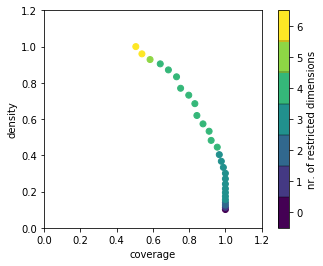

In [56]:
import pandas as pd

data = pd.read_csv('./data/bryant et al 2010.csv', index_col=False)


x = data.iloc[:, 2:11]
y = data.iloc[:, 15]

from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x,y, threshold = 0.8, peel_alpha = 0.1)
box1 = prim_alg.find_box()

import matplotlib.pyplot as plt
%matplotlib inline

box1.show_tradeoff()
plt.show()


coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



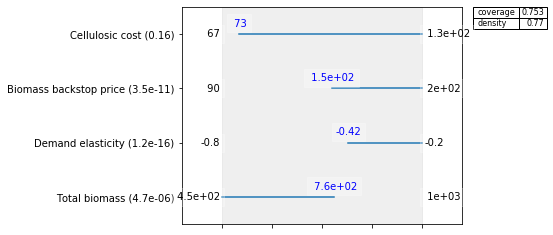

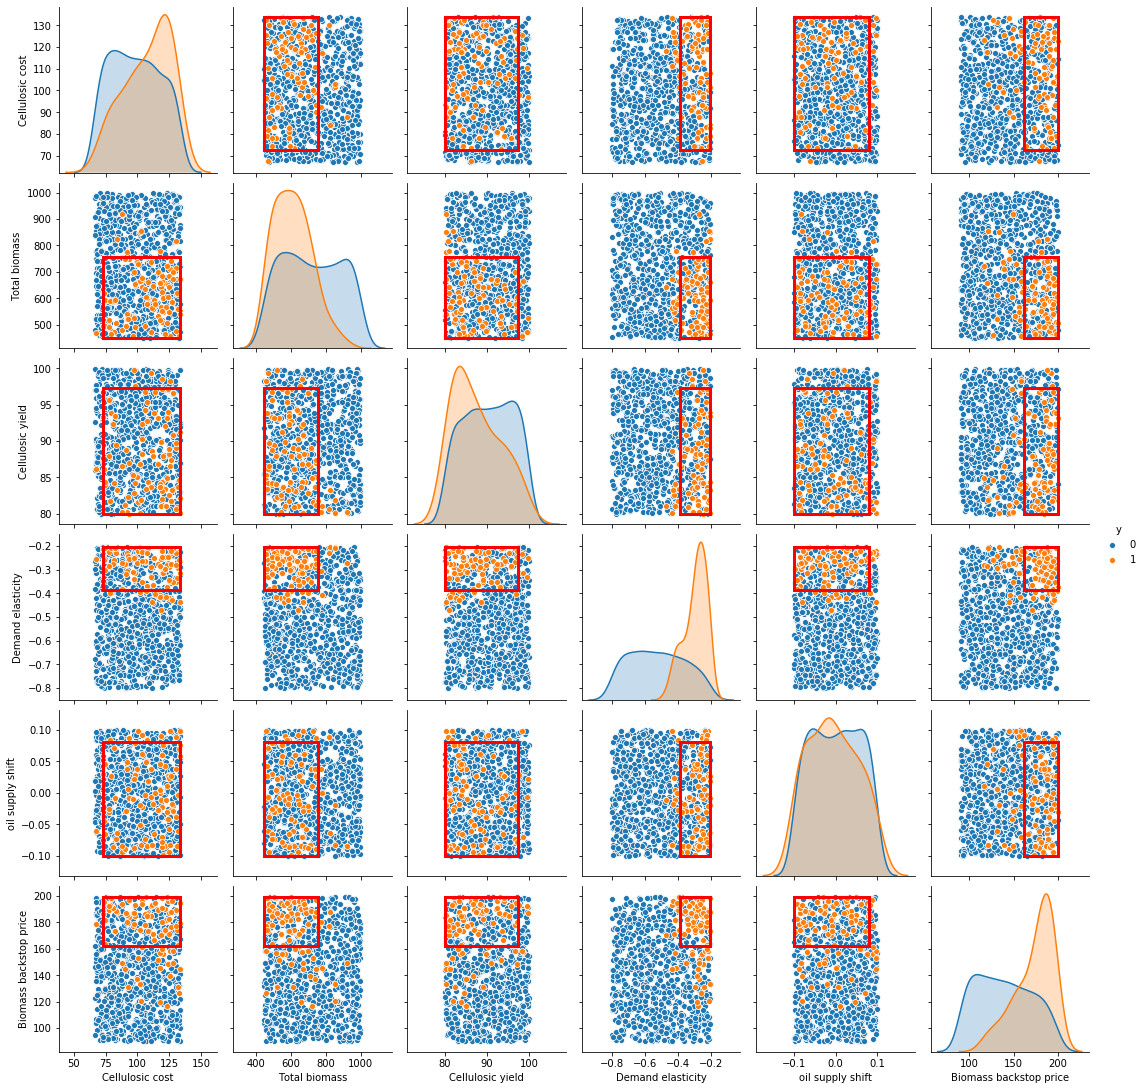

In [71]:
box1.inspect(21)
box1.inspect(21, style = 'graph')
# box1.inspect_tradeoff()


In [115]:
box2 = prim_alg.find_box()



[MainProcess/INFO] no data remaining


<Figure size 864x864 with 0 Axes>

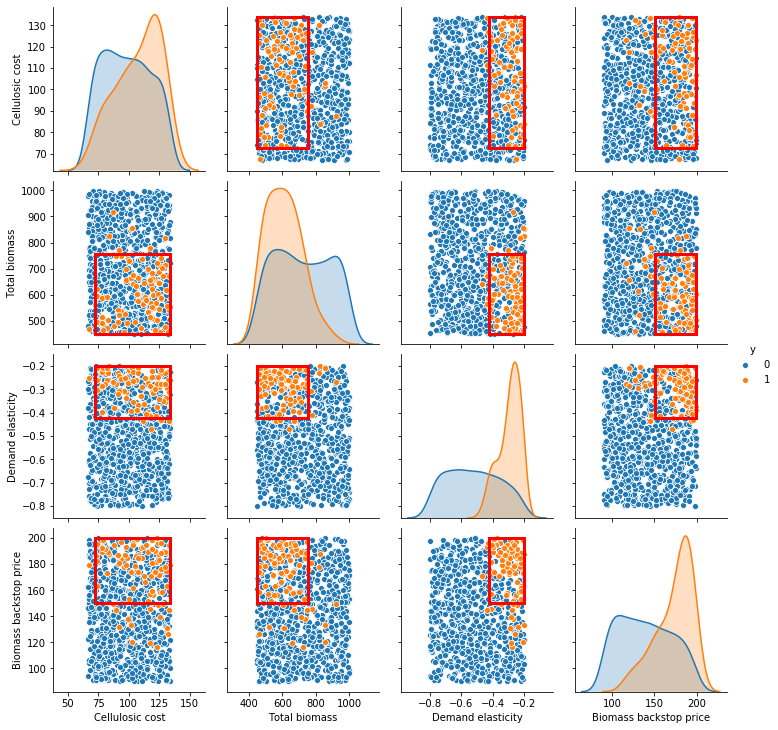

In [94]:
box1.select(21)

plt.figure(figsize = (12,12))
box1.show_pairs_scatter()
plt.show()


In [109]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 837 points remaining, containing 44 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.5625, returning dump box


In [111]:
print(prim_alg.stats_to_dataframe())
print(prim_alg.boxes_to_dataframe())

       coverage   density     mass  res_dim
box 1  0.505618  1.000000  0.05102        6
box 2  0.494382  0.052569  0.94898        0
                             box 1              box 2            
                               min         max    min         max
Demand elasticity        -0.384500   -0.202000   -0.8   -0.202000
Biomass backstop price  162.150002  199.600006   90.0  199.600006
Total biomass           450.000000  755.799988  450.0  997.799988
Cellulosic yield         80.000000   97.299999   80.0   99.900002
oil supply shift         -0.100000    0.080500   -0.1    0.099000
Cellulosic cost          72.650002  133.699997   67.0  133.699997


In [124]:
from ema_workbench.analysis import cart
cart_alg = cart.CART(x,y,0.05)
cart_alg.build_tree()

print(cart_alg.stats_to_dataframe())
print(cart_alg.boxes_to_dataframe())


       coverage   density  res dim      mass
box 1  0.011236  0.021739        2  0.052154
box 2  0.000000  0.000000        2  0.546485
box 3  0.000000  0.000000        2  0.103175
box 4  0.044944  0.090909        2  0.049887
box 5  0.224719  0.434783        2  0.052154
box 6  0.112360  0.227273        3  0.049887
box 7  0.000000  0.000000        3  0.051020
box 8  0.606742  0.642857        2  0.095238
                       box 1                  box 2               box 3  \
                         min         max        min         max     min   
Cellulosic yield        80.0   81.649998  81.649998   99.900002  80.000   
Demand elasticity       -0.8   -0.439000  -0.800000   -0.439000  -0.439   
Biomass backstop price  90.0  199.600006  90.000000  199.600006  90.000   

                                         box 4                box 5  \
                               max         min         max      min   
Cellulosic yield         99.900002   80.000000   99.900002   80.000   
Demand

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [170]:
data = pd.read_csv('./data/Rozenberg et al 2014.csv', index_col=None)

In [206]:

# Select the SSP to which you want to apply PRIM and the PRIM parameters you want to use
SSP = 5
threshold = 0.8
peel_alpha = 0.05

x = data.iloc[:, :7]
y = data.iloc[:, (SSP+6)]

prim_alg = prim.Prim(x,y, threshold = threshold, peel_alpha = peel_alpha)

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4


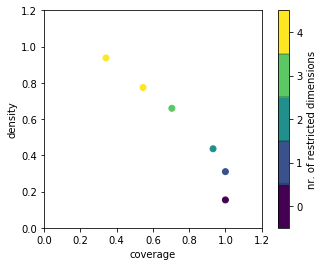

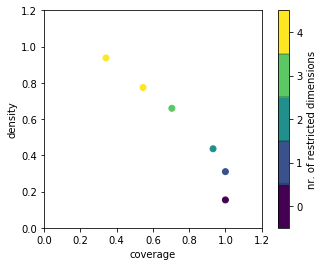

In [205]:
box1 = prim_alg.find_box()
box1.show_tradeoff()
# box1.inspect_tradeoff()

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [1]:
from ema_workbench.util.utilities import load_results
import numpy as np

tuple_data = load_results('./data/Hamarat et al 2013.gz')
df = tuple_data[0]
mydict = tuple_data[1]



In [183]:
#### get some insight in data structure and variables


df.info()
# df['Market price determination']
# df.head(10)


# mydict.keys()
# len(mydict['fraction renewables'])
# a= mydict['TIME']
# df_time = pd.DataFrame(a)
# df_time


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   SWITCH Market price determination             5000 non-null   category
 1   SWITCH TGC obligation curve                   5000 non-null   category
 2   SWITCH carbon cap                             5000 non-null   category
 3   SWITCH carbon price determination             5000 non-null   category
 4   SWITCH economic growth                        5000 non-null   category
 5   SWITCH electrification rate                   5000 non-null   category
 6   SWITCH interconnection capacity expansion     5000 non-null   category
 7   SWITCH lookup curve TGC                       5000 non-null   category
 8   SWITCH low reserve margin price markup        5000 non-null   category
 9   SWITCH physical limits                        5000 n

In [177]:
# Create a new otuput array that prim can use

df_ren = pd.DataFrame(mydict['fraction renewables'])
output_list = []

for i in list(df_ren[0] - df_ren[640]):
    if i <=0:
        output_list.append(1)
    if i == 0 or i >= 0:
        output_list.append(0)

output_array = np.asarray(output_list)
output_array[:, np.newaxis]


array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

[MainProcess/INFO] 5000 points remaining, containing 4129 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1184, coverage: 0.14337612012593848, density: 1.0 restricted_dimensions: 6


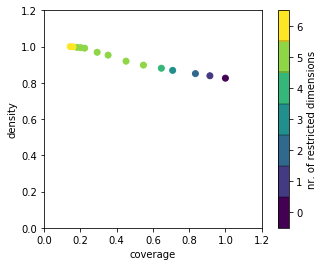

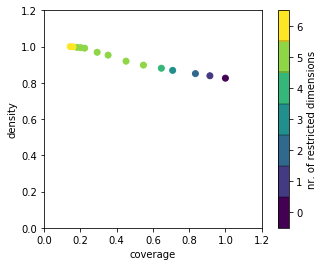

In [193]:
x = df[df.columns[:44]]
y = output_array


prim_alg = prim.Prim(x,y, threshold = 0.8, peel_alpha = 0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()


In [ ]:
# https://emaworkbench.readthedocs.io/en/latest/ema_documentation/util/utilities.html?highlight=load#ema_workbench.util.utilities.load_results
# ema_workbench.util.utilities.load_results(file_name)
# load the specified bz2 file. the file is assumed to be saves using save_results.
# kleine spelfout voor kwakkel